In [1]:
#Importa Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset 
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

dados-curso-completo.csv  ...                  hashtags
0            2020-03-23 18:51:14  ...                        []
1            2020-03-18 03:18:14  ...                        []
2            2020-03-29 12:09:27  ...                        []
3            2020-04-01 21:11:07  ...                        []
4            2020-03-19 17:49:40  ...                        []
...                          ...  ...                       ...
1658821      2020-05-12 13:02:34  ...                        []
1658822      2020-03-19 18:16:30  ...           ['CORONAVIRUS']
1658823      2020-04-07 18:14:45  ...  ['BolsonaroTemRazaoSim']
1658824      2020-06-02 16:04:51  ...                        []
1658825                      NaN  ...                       NaN

[1658826 rows x 13 columns]

#Visão Geral dos Dados

##Sem processamento

###Relatório

In [3]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=5e2dde9c2e3d97767ad2e46b431fbfc954b9dc3c359e0e49378383329bbbbe24
  Stored in directory: /tmp/pip-ephem-wheel-cache-mta3_y4n/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [4]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

In [5]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_covid, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report.html")

In [7]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Análises

O dataset:

*   Número de Variáveis - 13;
  *   9 Categóricas;
  *   4 Numéricas.
*   Número de Observações - 1658826.

De acordo com o relatório acima, **37.3%** do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Latitude - 99.5%;
*   Longitude - 99.5%
*   Lugar - 95.5%;
*   País - 95.5%;
*   Sigla - 95.5%.

Dois dos usuários que mais possuem comentários no dataset são canais de notícia de Portugal, inclusive uma delas aparece duas vezes por terem nome de usuários diferentes.

*   Agência Lusa - 1404;
*   tvi24 Últimas (1181) e tvi24 (1178) - 2359.

A coluna retweet tem valores que variam de 0 (1314424	ou 79.2%) a 1139763 (1 ou < 0.1%), fazendo com que os dados tenham uma assimetria positiva ou à direita, ou seja, maior que 0 (75.73862462). Esse comportamento pode ser melhor observado no gráfico abaixo.















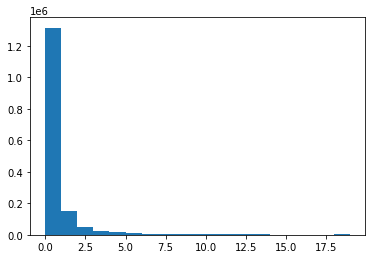

In [8]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

Os dados da coluna seguidores apresentam o mesmo comportamento descrito anteriormente. O usuário com o maior número de seguidores é o Donald Trump.

In [9]:
df_covid.loc[df_covid.seguidores == 84241250]

dados-curso-completo.csv          usuario  ... longitude hashtags
788393      2020-05-23 23:08:17  Donald J. Trump  ...       NaN       []

[1 rows x 13 columns]

A maioria dos textos estão no idioma português (95.7%), porém o relatório mostra que apenas 4.3% dos tweets são do Brasil e de Portugal. Outros países que tem como um de seus idiomas o português, correspondem a menos de 1% do dataset. Esse desencontro entre as informações se deve provavelmente aos dados faltantes na coluna País.

##Com processamento

In [82]:
#Selecionando somente texto com perguntas
df_processado = df_covid[df_covid['texto'].str.contains('\?', na = False)]
pd.set_option('display.max_info_columns', 5000)
df_processado.reset_index(inplace = True, drop = True)
df_processado

dados-curso-completo.csv  ...                              hashtags
0           2020-03-23 18:51:14  ...                                    []
1           2020-04-01 21:11:07  ...                                    []
2           2020-06-25 11:09:19  ...                                    []
3           2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
4           2020-03-30 00:43:36  ...                                    []
...                         ...  ...                                   ...
172496      2020-03-24 23:50:14  ...                                    []
172497      2020-03-26 21:43:24  ...                                    []
172498      2020-05-25 22:53:13  ...                                    []
172499      2020-03-13 17:26:18  ...                                    []
172500      2020-05-12 13:02:34  ...                                    []

[172501 rows x 13 columns]

In [88]:
df_processado.iloc[18,3]

'Qual é a necessidade disso? Até uma pandamia é motivo pra fazerem palanque pra militância? Pessoas amargando no lei… https://t.co/owPcn9Bxhf'

In [ ]:
#import re
#for x in df_processado.iloc[:5,3]:
#  m = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', x)
#  for i in m:
#    print(i)

In [12]:
#selecionando só as perguntas
#import re
#for x in df_processado['texto']:
#  m = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', x)
#  for i in m:
#    if i.count("?") > 0:
#      df_teste = df_processado.replace(to_replace = x, value =i)
#df_teste

In [89]:
colunas = df_processado.columns
colunas

Index(['dados-curso-completo.csv', 'usuario', 'apelido', 'texto', 'retweet',
       'seguidores', 'idioma', 'lugar', 'pais', 'sigla', 'latitude',
       'longitude', 'hashtags'],
      dtype='object')

In [91]:
df_novo = pd.DataFrame(columns = colunas)
df_novo

Empty DataFrame
Columns: [dados-curso-completo.csv, usuario, apelido, texto, retweet, seguidores, idioma, lugar, pais, sigla, latitude, longitude, hashtags]
Index: []

In [92]:
#SEPARA PERGUNTAS E COLOCA NA LISTA (NAO FUNCIONA PQ QUERIA COLOCAR DENTRO DE UM DATAFRAME)
aux = []
usuarios = []
import re
for index, row in df_processado.iterrows():
#for x in df_processado['texto']:
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      #usuarios.append(row['usuario'])
      df_novo['usuario'] = row['usuario']
      aux.append(i)

In [93]:
df_novo

Empty DataFrame
Columns: [dados-curso-completo.csv, usuario, apelido, texto, retweet, seguidores, idioma, lugar, pais, sigla, latitude, longitude, hashtags]
Index: []

In [63]:
import re
for index, row in df_processado.iterrows():
#for x in df_processado['texto']:
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      usuarios.append(row[1])
      #aux.append(i)

In [ ]:
usuarios

In [31]:
#TRANSFORMA A LISTA EM SÉRIE
texto = pd.Series(aux)
texto

0                    @BolsonaroSP Cade o fundão deputado???
1              Fumaça de cigarro pode propagar coronavírus?
2         @ipratesMD @dr_pampers Será que corremos o ris...
3         Prioridade ?!\n\n #COVID19 #floripa #isolament...
4         Que tal uma notícia boa, indo na contramão do ...
                                ...                        
196666                                           Ansiedade?
196667                                            Angústia?
196668                                               Covid?
196669    oms: tamo tendo pandemia evitar\n conglomerado...
196670    @OsmarTerra Sr. Osmar Terra, gostaria de ouvir...
Length: 196671, dtype: object

In [58]:
new_df = pd.DataFrame(aux, index = usuarios).stack()
#new_df = new_df.reset_index([0, 'usuario'])
#new_df.columns = ['EmployeeId', 'City']
new_df

Gaboardi                  0               @BolsonaroSP Cade o fundão deputado???
🚩                         0         Fumaça de cigarro pode propagar coronavírus?
Andreia Peraro            0    @ipratesMD @dr_pampers Será que corremos o ris...
Diorgenes Pandini         0    Prioridade ?!\n\n #COVID19 #floripa #isolament...
Valnei do Val             0    Que tal uma notícia boa, indo na contramão do ...
                                                     ...                        
O que houve com a couve?  0                                           Ansiedade?
                          0                                            Angústia?
                          0                                               Covid?
broca                     0    oms: tamo tendo pandemia evitar\n conglomerado...
Renato 🇧🇷                 0    @OsmarTerra Sr. Osmar Terra, gostaria de ouvir...
Length: 196671, dtype: object

In [32]:
texto.str.len()

0          38
1          44
2          85
3          69
4         112
         ... 
196666     10
196667      9
196668      6
196669     83
196670    134
Length: 196671, dtype: int64

In [ ]:
#TENTATIVA DE MODIFICAR O DATAFRAME PARA RECEBER ESSAS FRASES (NÃO FUNCIONA POR CAUSA DO - texto.str.len())
from itertools import chain

df_novo = (df_processado.loc[df_processado.index.repeat(if ), cols].assign(texto=list(chain.from_iterable(texto.tolist()))))
df_novo

In [ ]:
for key, value in meu_dicionario.items():
  
  for index, row in df_processado.iterrows():
    if index == key:
      df_novo = row[key]
      #print(value)
df_novo

In [ ]:
#selecionando só as perguntas
teste = []
import re
for x in df_processado.iloc[0:5,3]:
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', x)
  for i in m:
    if i.count("?") > 0:
      teste.append(i)
teste

Visualizar todas as colunas do DATAFRAME

In [ ]:
df_covid.columns.values

Montagem de Lista, com os atributos selecinados no arquvivo

In [ ]:
colunasSelecionadas = ['texto','retweet','pais','lugar','latitude','longitude']

Filtra e cria um novo DATAFRAME, somente as colunas selecionadas

In [ ]:
df_covid_selecionado = df_covid.filter(items=colunasSelecionadas)


Cabeçalho com as colunas Selecionadas

In [ ]:
df_covid_selecionado.head()

Deletar todo o conteúdo NaN = Not a Number no DATAFRAME

In [ ]:
#df_covid_selecionado = df_covid_selecionado.dropna()

In [ ]:
#df_covid_selecionado.head()

Agrupa e conta as colunas definidas no DATAFRAME.
**Quando há mais de uma coluna no group by deve-se usar []**

In [ ]:
df_covid_selecionado.filter(items=['pais','lugar','retweet','latitude','longitude']).groupby(['pais','lugar']).count().sort_values(by='retweet', ascending=False)

In [ ]:
df_covid_selecionado.filter(items=['pais','lugar','retweet','latitude','longitude']).groupby(['pais','lugar'])\
.mean()

In [ ]:
df_covid_selecionado.filter(items=['pais','lugar','retweet','latitude','longitude']).groupby(['pais','lugar']).describe()

In [ ]:
print(ascii('?'))
Brasil = df_covid_selecionado [df_covid_selecionado['pais'] =='Brazil']
texto_bruto = Brasil.filter(items=['texto','pais','lugar'])
texto_bruto[texto_bruto['texto'].str.contains(ascii('?'))]
    

In [ ]:
caminho_do_arquivo = '\csv_uea\sentenca_tweet.csv'
texto_bruto.to_csv(caminho_do_arquivo, index=False)
print(caminho_do_arquivo)

Realizar um FILTRO dentro do DATAFRAME

In [ ]:
df_covid_selecionado [df_covid_selecionado['lugar'] =='Manaus']

Cria uma lista de 'lugares' com chaves únicas

In [ ]:
#sorted(df_covid_selecionado['lugar'].unique())
lista_paises = df_covid_selecionado['pais'].unique()

In [ ]:
lista_paises

FOR para criar um arquivo CSV para cada país unico armazenado na *lista de* *lugares*, quando usamos {} no nome do arquivo, ele será substituido pelo a posição do FOR na função FORMAT

In [ ]:
import csv 
import os

In [ ]:
caminho = '\\csv_uea\\'

if not os.path.exists(caminho): 
  os.makedirs(caminho)
  print(caminho)
#if not os.path.exists(arquivo): 
#  open(arquivo, 'w')

In [ ]:
for pais in lista_paises:
    caminho_do_arquivo = '\csv_uea\pais_{}_tweet.csv'.format(pais)
    df_covid_selecionado[df_covid_selecionado['pais'] == 'Brazil'].to_csv(caminho_do_arquivo, index=False) 
    print(caminho_do_arquivo)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Criando uma nova coluna no DATAFRAME

In [ ]:
df_covid ['categoria'] = ''

In [ ]:
df_covid.head()

Criando uma Lista de Remédios

In [ ]:
list_remedio = ['Azitromicina','AAS','Buscopan']
list_remedio

#Temas Discutidos

#Visão Temporal

#Visão Geográfica